# Perform online segmentation

In [1]:
%cd ../dev/
from dataset_creation import Synthetic_Dataset
from hots.utils import get_loader, fit_mlr, predict_mlr, make_histogram_classification, score_classif_events

/home/antoine/homhots/aprovhots/notebook


In [2]:
path = '../../Data/2021-12-06_simulator_data/'
patch_size = (16,16)
max_duration = 1e3
n_classes = 2

trainset = Synthetic_Dataset(save_to=path, train=True, patch_size=patch_size, max_duration=max_duration)
testset = Synthetic_Dataset(save_to=path, train=False, patch_size=patch_size, max_duration=max_duration)

## Example with only one layer of Multinomial Logistic Regression (MLR)

In [3]:
jitter = (None, None)
num_workers = 0
learning_rate = 0.005
betas = (0.9, 0.999)
num_epochs = 2 ** 5 + 1
N_polarities = 2
ts_size = (trainset.sensor_size[0],trainset.sensor_size[1],N_polarities)
tau_cla = 1e5
date = '2022-05-18'
mlr_layer_name = f'{date}_LR_{tau_cla}_{ts_size}_{learning_rate}_{betas}_{num_epochs}_{jitter}.pkl'

model_path = '../Records/networks/' + mlr_layer_name
results_path = f'../Records/LR_results/' + mlr_layer_name

trainloader = get_loader(trainset)
classif_layer, losses = fit_mlr(trainloader, model_path, tau_cla, learning_rate, betas, num_epochs, ts_size, trainset.ordering, len(trainset.classes))

Mean accuracy: 99.9%


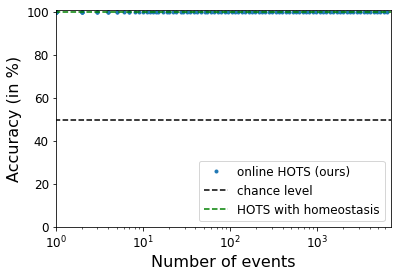

In [4]:
testloader = get_loader(testset)

likelihood, true_target, timestamps = predict_mlr(classif_layer,tau_cla,testloader,results_path,ts_size,testset.ordering)
score = make_histogram_classification(trainset, testset, 2)
meanac, onlinac, lastac = score_classif_events(likelihood, true_target, n_classes, original_accuracy = score)